In [ ]:

import pandas as pd
import streamlit as st
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['font.family'] = 'Noto Sans CJK JP'

In [ ]:
def columns_datatype_change(df):
    for col in df.columns:
        date_change = df[col].astype(str).str.match(r'^\d{4}/\d{1,2}/\d{1,2}$', na=False).any()
        if date_change:
            df[col] = pd.to_datetime(df[col], format='%Y/%m/%d', errors='coerce')

    return df

#棒グラフ×折れ線グラフ
def bar_line_plot(df,x_columun,y_columun1,y_columun2,title):
    #グラフの描画設定
    fig = plt.figure(figsize=(7, 4), facecolor="w")
    plt.rcParams["font.size"] = 10
    #X軸を非連続にするために文字列に変換
    df['x_numeric'] = df[x_columun].astype(str)
    ax1 = fig.subplots()
    ax2 = ax1.twinx()
    #Y軸の最小、最大値を設定
    ax1.set_ylim([0, df[y_columun1].max()*1.1])
    ax2.set_ylim([0, df[y_columun2].max()*1.1])
    #Y軸目盛の描画を設定
    ax1.grid(True)
    ax2.grid(False)
    #グラフ色を設定
    color1="gray"
    color2="orange"
    # グラフ描画
    sns.barplot( x='x_numeric', y=y_columun1, data=df,ax=ax1, color=color1, label='売上[USドル]')
    sns.lineplot( x='x_numeric', y=y_columun2, data=df, ax=ax2, color=color2,label="利益率[%]")
    # 凡例を取得
    handler1, label1 = ax1.get_legend_handles_labels()
    handler2, label2 = ax2.get_legend_handles_labels()
    # ax1で凡例をまとめて表示
    ax1.legend(handler1 + handler2, label1 + label2, loc="lower left",fontsize=10)
    # ax2の凡例は削除
    ax2.get_legend().remove()
    #タイトル、軸ラベルの設定
    plt.title(title,fontsize=15)
    ax1.set_xlabel('')
    ax1.set_ylabel('売上[USドル]',fontsize=15)
    ax2.set_ylabel('利益率[%]',fontsize=15)
    plt.tight_layout()
    return fig

#複数棒グラフ×折れ線グラフ
def stakedbar_line_plot(df,x_columun,y_columun1,y_columun2,stacked_columun1,title):
    #グラフの描画設定
    fig = plt.figure(figsize=(7, 4), facecolor="w")
    plt.rcParams["font.size"] = 10
    #X軸を非連続にするために文字列に変換
    df['x_numeric'] = df[x_columun].astype(str)
    ax1 = fig.subplots()
    ax2 = ax1.twinx()
    #Y軸の最小、最大値を設定
    ax1.set_ylim([0, df[y_columun1].max()*1.1])
    ax2.set_ylim([0, df[y_columun2].max()*1.1])
    #Y軸目盛の描画を設定
    ax1.grid(True)
    ax2.grid(False)
    #グラフ色を設定
    palette1='dark:gray'
    palette2='hls'
    # グラフ描画
    sns.barplot( x='x_numeric', y=y_columun1, data=df,ax=ax1,hue=stacked_columun1, palette=palette1)
    sns.lineplot( x='x_numeric', y=y_columun2, data=df, ax=ax2,hue=stacked_columun1, palette=palette2)
    # 凡例の位置とフォントサイズを変更
    ax1.legend(loc="lower left",fontsize=10)
    ax2.legend(loc="lower right",fontsize=10)
    #タイトル、軸ラベルの設定
    plt.title(title,fontsize=15)
    ax1.set_xlabel('')
    ax1.set_ylabel('売上[USドル]',fontsize=15)
    ax2.set_ylabel('利益率[%]',fontsize=15)
    plt.tight_layout()
    return fig

#棒グラフ
def bar_plot(df,x_columun,y_columun,y_rabel,title,rotation):
    #グラフの描画設定
    fig,ax= plt.subplots(figsize=(8, 3), facecolor="w")
    plt.rcParams["font.size"] = 10
    plt.rcParams["xtick.labelsize"]=10
    plt.rcParams["ytick.labelsize"]=10
    #X軸を非連続にするために文字列に変換
    df['x_numeric'] = df[x_columun].astype(str)
    sns.barplot(x = 'x_numeric', y = y_columun, data = df,ax=ax,color='gray')
    plt.xticks(rotation=rotation)
    #タイトル、軸ラベルの設定
    plt.title(title,fontsize=15)
    ax.set_xlabel('')
    ax.set_ylim([0, df[y_columun].max()*1.1])
    ax.set_ylabel(y_rabel,fontsize=10)
    plt.tight_layout()
    return fig

#複数棒グラフ
def stakedbar_plot(df,x_columun,y_columun,stacked_columun,title,rotation):
    #グラフの描画設定
    fig,ax= plt.subplots(figsize=(7, 4), facecolor="w")
    plt.rcParams["font.size"] = 10
    plt.rcParams["xtick.labelsize"]=10
    plt.rcParams["ytick.labelsize"]=10
    #X軸を非連続にするために文字列に変換
    df['x_numeric'] = df[x_columun].astype(str)
    pivot_df = df.pivot_table(index=x_columun, columns=stacked_columun, values=y_columun, aggfunc='sum', fill_value=0)
    pivot_df.plot(kind='bar', stacked=True, ax=ax)
    # sns.barplot(x = 'x_numeric', y = y_columun, data = df,ax=ax,color='gray')
    plt.xticks(rotation=rotation)
    # グラフ描画
    # sns.barplot( x='x_numeric', y=y_columun, data=df,ax=ax,hue=stacked_columun,stacked=True, palette='dark:gray')
    # sns.lineplot( x='x_numeric', y=y_columun2, data=df, ax=ax2,hue=stacked_columun1, palette=palette2)
    # 凡例の位置とフォントサイズを変更
    ax.legend(loc="lower left",fontsize=10)
    #タイトル、軸ラベルの設定
    plt.title(title,fontsize=15)
    ax.set_xlabel('')
    ax.set_ylabel('売上[USドル]',fontsize=15)
    plt.tight_layout()
    return fig

#散布図
def catplot_strip(df,x_columun,y_columun,y_rabel,title):
    #グラフの描画設定
    fig,ax= plt.subplots(figsize=(8, 3), facecolor="w")
    plt.rcParams["font.size"] = 10
    plt.rcParams["xtick.labelsize"]=10
    plt.rcParams["ytick.labelsize"]=10
    #X軸を非連続にするために文字列に変換
    df['x_numeric'] = df[x_columun].astype(str)
    sns.stripplot(x = 'x_numeric', y = y_columun, data = df,ax=ax,color='gray')
    plt.xticks(rotation=90)
    #タイトル、軸ラベルの設定
    plt.title(title,fontsize=15)
    ax.set_xlabel('')
    ax.set_ylabel(y_rabel,fontsize=10)
    ax.axhline(y=0, color='orange', linestyle='--')
    plt.tight_layout()
    return fig
#折れ線グラフ
def line_plot(df,x_columun,y_columun,y_rabel,title):
    #グラフの描画設定
    fig,ax= plt.subplots(figsize=(8, 2), facecolor="w")
    plt.rcParams["font.size"] = 10
    plt.rcParams["xtick.labelsize"]=10
    plt.rcParams["ytick.labelsize"]=10
    # グラフ描画
    sns.lineplot( x=x_columun, y=y_columun, data=df, ax=ax, color='gray')
    #タイトル、軸ラベルの設定
    plt.title(title,fontsize=15)
    ax.set_xlabel('')
    if title=='リピート率推移※2014は初年度のため無し':
        plt.xticks(df['year'])
    ax.set_ylabel(y_rabel,fontsize=10)
    plt.tight_layout()
    return fig
def reg_plot(df,x_columun,y_columun,x_rabel,y_rabel,title):
    #グラフの描画設定
    fig,ax= plt.subplots(figsize=(4, 2), facecolor="w")
    plt.rcParams["font.size"] = 10
    plt.rcParams["xtick.labelsize"]=10
    plt.rcParams["ytick.labelsize"]=10
    # グラフ描画
    sns.regplot( x=x_columun, y=y_columun, data=df, ax=ax, color='gray')
    #タイトル、軸ラベルの設定
    plt.title(title,fontsize=15)
    ax.set_xlabel(x_rabel,fontsize=10)
    ax.set_ylabel(y_rabel,fontsize=10)
    plt.tight_layout()
    return fig

In [9]:
#元データ読み込み
orders_df= pd.read_csv('data_csv/Orders.csv')
# people_df= pd.read_csv('data_csv/People.csv')
returns_df= pd.read_csv('data_csv/Returns.csv')
language_df= pd.read_csv('data_csv/language.csv')
#データ型の調査
print(orders_df.dtypes)
# print(people_df.dtypes)
print(returns_df.dtypes)
print(language_df.dtypes)
#Null有無の調査
print(orders_df.isnull().values.sum())
# print(people_df.isnull().values.sum())
print(returns_df.isnull().values.sum())

#カラム文字列の判別結果から日付け型に変換
orders_df=columns_datatype_change(orders_df)

#使用するテーブルを結合
merge_df=pd.merge(orders_df,returns_df,how='left',on='Order ID')

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object
Returned    object
Order ID    object
dtype: object
English     object
japanese    object
dtype: object
0
0


In [10]:

merge_df['year']=merge_df['Order Date'].dt.year.astype(int)
merge_df['month']=merge_df['Order Date'].dt.month
merge_df=merge_df.replace({'Region': {'South': '南','Central': '中央','East': '東','West': '西'}})
merge_df=merge_df.replace({'State': {"California": "カリフォルニア", "Florida": "フロリダ", "North Carolina": "ノースカロライナ", "Washington": "ワシントン", "Texas": "テキサス"
                                      , "Wisconsin": "ウィスコンシン", "Utah": "ユタ", "Nebraska": "ネブラスカ", "Pennsylvania": "ペンシルベニア", "Illinois": "イリノイ"
                                      , "Minnesota": "ミネソタ", "Michigan": "ミシガン", "Delaware": "デラウェア", "Indiana": "インディアナ", "New York": "ニューヨーク"
                                      , "Arizona": "アリゾナ", "Virginia": "バージニア", "Tennessee": "テネシー", "Alabama": "アラバマ", "South Carolina": "サウスカロライナ"
                                      , "Oregon": "オレゴン", "Colorado": "コロラド", "Iowa": "アイオワ", "Ohio": "オハイオ", "Missouri": "ミズーリ", "Oklahoma": "オクラホマ"
                                      , "New Mexico": "ニューメキシコ", "Louisiana": "ルイジアナ", "Connecticut": "コネチカット", "New Jersey": "ニュージャージー"
                                      , "Massachusetts": "マサチューセッツ", "Georgia": "ジョージア", "Nevada": "ネバダ", "Rhode Island": "ロードアイランド"
                                      , "Mississippi": "ミシシッピ", "Arkansas": "アーカンソー", "Montana": "モンタナ", "New Hampshire": "ニューハンプシャー"
                                      , "Maryland": "メリーランド", "District of Columbia": "ワシントンD.C.（コロンビア特別区）", "Kansas": "カンザス", "Vermont": "バーモント"
                                      , "Maine": "メイン", "South Dakota": "サウスダコタ", "Idaho": "アイダホ", "North Dakota": "ノースダコタ", "Wyoming": "ワイオミング"
                                      , "West Virginia": "ウェストバージニア","Kentucky":"ケンタッキー"}})
merge_df=merge_df.replace({'Category': {"Furniture": "家具", "Office Supplies": "事務用品", "Technology": "電子機器"}})
merge_df =merge_df.replace({'Sub-Category': {'Bookcases': '本棚', 'Chairs': '椅子', 'Labels': 'ラベル', 'Tables': 'テーブル', 'Storage': '収納', 'Furnishings': 'インテリア'
                                             , 'Art': 'アート', 'Phones': '電話', 'Binders': 'バインダー', 'Paper': '紙', 'Accessories': 'アクセサリー', 'Envelopes': '封筒'
                                             , 'Fasteners': '留め具', 'Supplies': '備品', 'Appliances': '家電', 'Copiers': 'コピー機', 'Machines': '機械'}})
merge_df['Discount_flg']=merge_df['Discount'].apply(lambda x : 1 if x >0 else 0)
merge_df['Sub-_Category_flg']=1
merge_df['Discount']=merge_df['Discount']*100
#------------------------------------------------------------------------------------------------------------------
#【全期間対象】
merge_df['profit_ratio']=(merge_df['Profit']/merge_df['Sales'])*100#利益率計算
first_order_date = merge_df.groupby('Customer ID')['Order Date'].transform('min')
merge_df['new_customers_flg'] = (merge_df['Order Date'] == first_order_date).astype(int)
merge_df['customers_new_old']=merge_df['new_customers_flg'].apply(lambda x : '新規' if x ==1 else '既存')

#------------------------------------------------------------------------------------------------------------------
#【日別集計】
date_df=merge_df[['Order Date','year','month','Sales','Quantity','Discount','Profit']]
date_df=date_df.groupby(['year','month','Order Date'],as_index=False).sum()#期間で集計
date_df['profit_ratio']=(date_df['Profit']/date_df['Sales'])*100#利益率計算
#【日別集計】2017年度2月
date_17_2_df=date_df[['Order Date','year','month','Sales','Quantity','Discount','Profit','profit_ratio']]
date_17_2_df=date_17_2_df[(date_17_2_df['year']==2017)&(date_17_2_df['month']==2)]

#【月別集計】
month_df=merge_df[['year','month','Sales','Quantity','Discount','Profit']]#数値列のみに限定
month_df=month_df.groupby(['year','month'],as_index=False).sum()#期間で集計
month_df['profit_ratio']=(month_df['Profit']/month_df['Sales'])*100#利益率計算
#【月別集計】2017年度
month_17_df=month_df[['year','month','Sales','Quantity','Discount','Profit']]
month_17_df=month_17_df[(month_17_df['year']==2017)]

#【年別集計】
year_df=merge_df[['year','Sales','Quantity','Discount','Profit']]#数値列のみに限定
year_df=year_df.groupby(['year'],as_index=False).sum()#期間で集計
year_df['profit_ratio']=(year_df['Profit']/year_df['Sales'])*100#利益率計算
#【年別集計】2016-17年度
year_16_17_df=year_df[['year','Sales','Quantity','Discount','Profit','profit_ratio']]
year_16_17_df=year_16_17_df[(year_16_17_df['year']==2016)|(year_16_17_df['year']==2017)]
#【年別集計】2017年度
year_17_df=year_df[['year','Sales','Quantity','Discount','Profit','profit_ratio']]
year_17_df=year_17_df[(year_17_df['year']==2017)]
#------------------------------------------------------------------------------------------------------------------
#【地域・年別集計】
year_region_df=merge_df[['year','Region','Sales','Quantity','Discount','Profit']]
year_region_df=year_region_df.groupby(['year','Region'],as_index=False).sum()
year_region_df['profit_ratio']=(year_region_df['Profit']/year_region_df['Sales'])*100
#【地域・年別集計】2016-17年度
year_16_17_region_df=year_region_df[['year','Region','Sales','Quantity','Discount','Profit','profit_ratio']]
year_16_17_region_df=year_16_17_region_df[(year_16_17_region_df['year']==2016)|(year_16_17_region_df['year']==2017)]

#【州・年別集計】
year_state_df=merge_df[['year','Region','State','Sales','Quantity','Discount','Profit']]
year_state_df=year_state_df.groupby(['year','Region','State'],as_index=False).sum()
year_state_df['profit_ratio']=(year_state_df['Profit']/year_state_df['Sales'])*100
#【州・年別集計】南・中央地区、2017年度
year_17_south_central_state_df=year_state_df[['year','Region','State','Sales','Quantity','Discount','Profit','profit_ratio']]
year_17_south_central_state_df=year_17_south_central_state_df[((year_17_south_central_state_df['Region']=='南')
                                                                     |(year_17_south_central_state_df['Region']=='中央'))
                                                                     &(year_17_south_central_state_df['year']==2017)]
year_17_south_central_state_df=year_17_south_central_state_df.sort_values('profit_ratio',ascending=False)
#【州・年別集計】南地区、2017年度
year_17_south_state_df=year_state_df[['year','Region','State','Sales','Quantity','Discount','Profit','profit_ratio']]
year_17_south_state_df=year_17_south_state_df[(year_17_south_state_df['Region']=='南')&(year_17_south_state_df['year']==2017)]
year_17_south_state_df=year_17_south_state_df.sort_values('Sales',ascending=False)
#------------------------------------------------------------------------------------------------------------------
#【カテゴリ・年別集計】
year_category_df=merge_df[['year','Category','Sales','Quantity','Discount','Profit']]
year_category_df=year_category_df.groupby(['year','Category'],as_index=False).sum()
year_category_df['profit_ratio']=(year_category_df['Profit']/year_category_df['Sales'])*100
#【カテゴリ・年別集計】2016-17年度
year_17_category_df=year_category_df[['year','Category','Sales','Quantity','Discount','Profit','profit_ratio']]
year_17_category_df=year_17_category_df[(year_17_category_df['year']==2016)|(year_17_category_df['year']==2017)]

#【サブカテゴリ・年別集計】
year_subcategory_df=merge_df[['year','Category','Sub-Category','Sales','Quantity','Discount','Profit','Discount_flg','Sub-_Category_flg']]
year_subcategory_df=year_subcategory_df.groupby(['year','Category','Sub-Category'],as_index=False).sum()
year_subcategory_df['profit_ratio']=(year_subcategory_df['Profit']/year_subcategory_df['Sales'])*100
year_subcategory_df['Discount_ratio']=(year_subcategory_df['Discount_flg']/year_subcategory_df['Sub-_Category_flg'])*100
# 【サブカテゴリ・年別集計】2017年度
year_17_subcategory_df=year_subcategory_df[['year','Category','Sub-Category','Sales','Quantity','Discount','Profit','profit_ratio','Discount_ratio']]
year_17_subcategory_df=year_17_subcategory_df[(year_17_subcategory_df['Category']=='家具')&(year_17_subcategory_df['year']==2017)]
year_17_subcategory_df=year_17_subcategory_df.sort_values('Sales',ascending=False)


   year  repeat_rate
0  2015         73.4
1  2016         78.9
2  2017         87.5


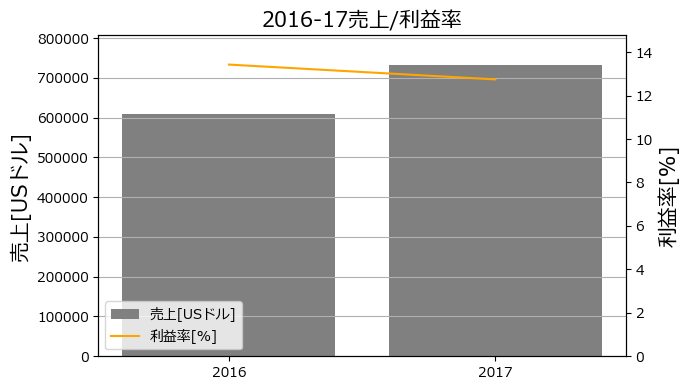

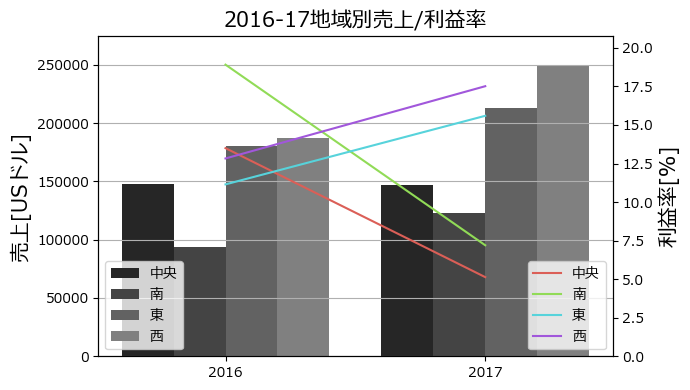

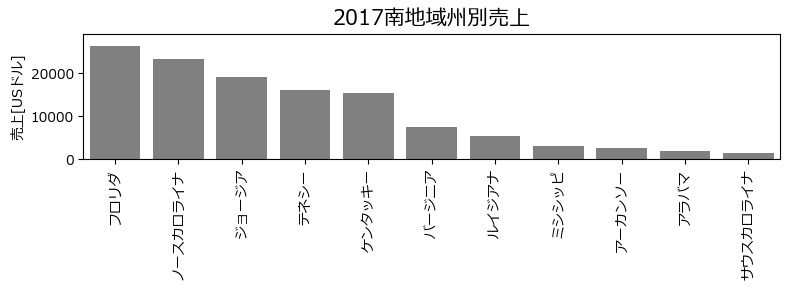

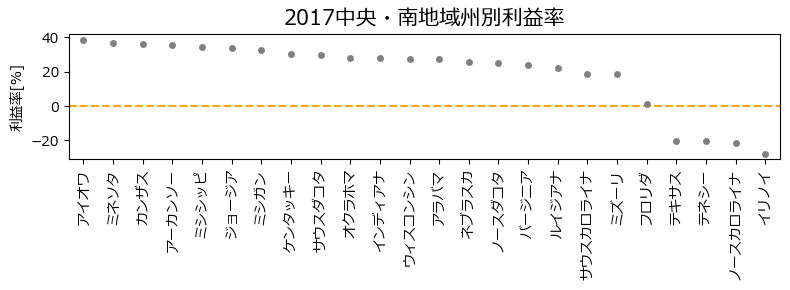

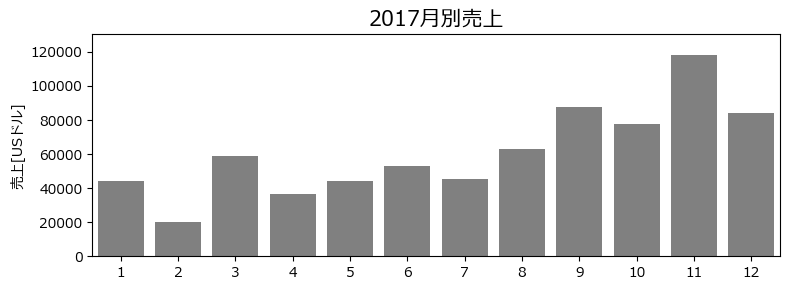

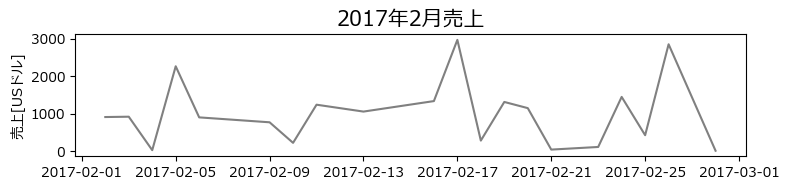

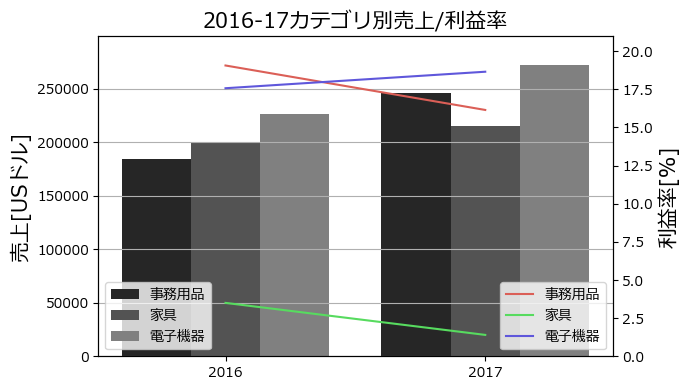

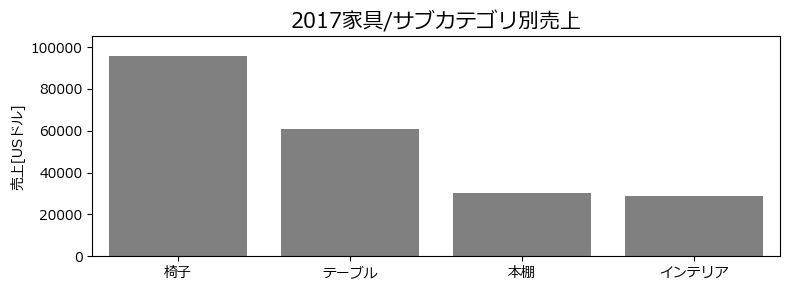

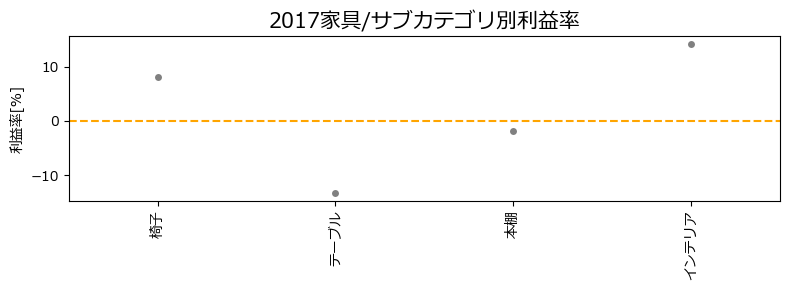

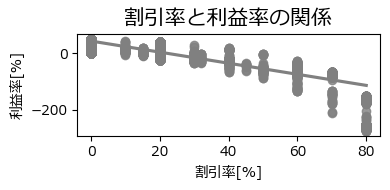

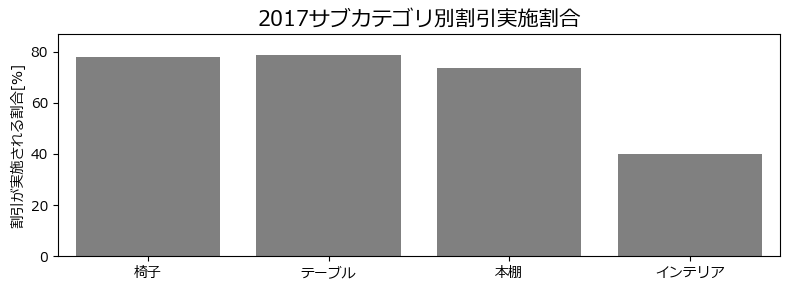

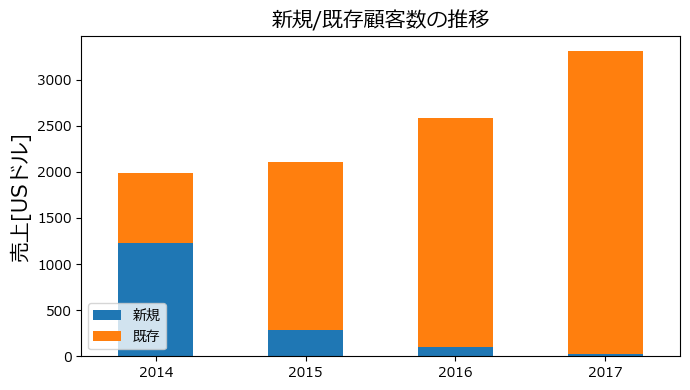

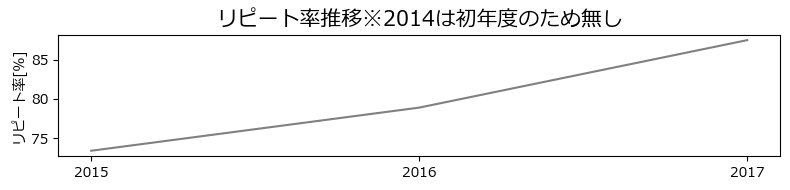

In [11]:
#グラフの生成
fig1 = bar_line_plot(year_16_17_df,'year','Sales','profit_ratio','2016-17売上/利益率')
fig2 = stakedbar_line_plot(year_16_17_region_df,'year','Sales','profit_ratio','Region','2016-17地域別売上/利益率')
fig3 = bar_plot(year_17_south_state_df,'State','Sales','売上[USドル]','2017南地域州別売上',90)
fig4 = catplot_strip(year_17_south_central_state_df,'State','profit_ratio','利益率[%]','2017中央・南地域州別利益率')
fig5 = bar_plot(month_17_df,'month','Sales','売上[USドル]','2017月別売上',0)
fig6 = line_plot(date_17_2_df,'Order Date','Sales','売上[USドル]','2017年2月売上')
fig7 = stakedbar_line_plot(year_17_category_df,'year','Sales','profit_ratio','Category','2016-17カテゴリ別売上/利益率')
fig8 = bar_plot(year_17_subcategory_df,'Sub-Category','Sales','売上[USドル]','2017家具/サブカテゴリ別売上',0)
fig9 = catplot_strip(year_17_subcategory_df,'Sub-Category','profit_ratio','利益率[%]','2017家具/サブカテゴリ別利益率')
fig10 = reg_plot(merge_df,'Discount','profit_ratio','割引率[%]','利益率[%]','割引率と利益率の関係')
fig11 = bar_plot(year_17_subcategory_df,'Sub-Category','Discount_ratio','割引が実施される割合[%]','2017サブカテゴリ別割引実施割合',0)
fig12 = stakedbar_plot(merge_df[['year','customers_new_old','Customer ID','Sales']].groupby(['year','customers_new_old'])['Sales'].agg(['count', 'sum']).reset_index(),'year','count','customers_new_old','新規/既存顧客数の推移',0)
table1 = merge_df.groupby('customers_new_old').agg({'Sales': 'sum','Customer ID': 'nunique'}).reset_index()
table1['avg_cstm_spd'] = (table1['Sales'] / table1['Customer ID']).round(0).astype(int)
table1 = table1[['customers_new_old', 'avg_cstm_spd']]
table1.columns = ['顧客層', '客単価[ドル]']

# リピート率を計算
customers_by_year = merge_df.groupby('year')['Customer ID'].unique().to_dict()
repeat_data = []
years = sorted(customers_by_year.keys())
for i in range(1, len(years)):
    prev_year = int(years[i - 1])
    curr_year = int(years[i])
    prev_customers = set(customers_by_year[prev_year])
    curr_customers = set(customers_by_year[curr_year])
    repeaters = prev_customers & curr_customers
    repeat_rate = len(repeaters) / len(prev_customers) if len(prev_customers) > 0 else 0
    repeat_data.append({
        'year': int(curr_year),
        'repeat_rate': round(repeat_rate * 100, 1)  # パーセント表記
    })
repeat_df = pd.DataFrame(repeat_data)
repeat_df['year'] = repeat_df['year'].astype(int)
print(repeat_df)
fig13 = line_plot(repeat_df,'year','repeat_rate','リピート率[％]','リピート率推移※2014は初年度のため無し')

# plt.show()

In [ ]:
import streamlit as st
import pandas as pd

st.set_page_config(page_title="main_dashboard", layout="wide")

# CSSによる全体書式
st.markdown("""
<style>
    .stMarkdown p { margin-bottom: 0.3rem; }
    .stMarkdown { line-height: 1.2; }
    .stMarkdown h1, .stMarkdown h2, .stMarkdown h3 { margin-top: 0.5rem; margin-bottom: 0.5rem; }
</style>
""", unsafe_allow_html=True)

# ページ構成選択
section = st.sidebar.radio("表示するセクションを選択", [
    "表紙・アジェンダ",
    "➀ 財務状況",
    "➁ 売上・利益率分析",
    "➂ 改善施策の提案",
    "➃ 今後に向けて"
])

if section == "表紙・アジェンダ":
    st.write("## マーケティング担当者様向け")
    st.markdown("### <u>売上・利益構造の可視化と改善提案</u>", unsafe_allow_html=True)
    st.markdown("#### ～サンプルスーパーストア データ分析レポート～", unsafe_allow_html=True)
    st.write("")
    st.divider()
    
    st.header(':blue[アジェンダ]')
    st.markdown("""
    #### ➀ 財務状況  
    <span style='color:gray;'>・2016-17年度業績報告</span><br>
    #### ➁ 売上・利益率分析レポート  
    <span style='color:gray;'>・地域/州別<br>
    ・月別売上<br>
    ・カテゴリ/サブカテゴリ別 売上・利益率<br>
    ・割引と利益率の関連性<br>
    ・新規/既存顧客数推移と客単価<br>
    ・顧客のリピート率</span><br>
    #### ➂ 改善施策の提案  
    #### ➃ 今後に向けて  
    """, unsafe_allow_html=True)
    st.divider()

elif section == "➀ 財務状況":
    st.header(':blue[➀ 財務状況]')
    st.subheader("業績報告")
    col1, col2 = st.columns([1, 1])
    with col1:
        st.write(fig1)
    with col2:
        st.markdown("### :gray[売上]")
        st.markdown("### :blue[+120Kドル]")
        st.markdown("### :gray[利益率]")
        st.markdown("### :orange[-0.7%]")
    st.markdown("### <u>売上の継続的な向上と利益率の改善が必要</u>", unsafe_allow_html=True)
    st.divider()

elif section == "➁ 売上・利益率分析":
    st.header(':blue[➁ 売上・利益率分析レポート]')

    st.subheader("地域/州別 売上・利益率")
    col1, col2 = st.columns([1, 1])
    with col1:
        st.write(fig2)
        st.write(fig3)
        st.write(fig4)
    with col2:
        st.markdown("#### ")
        st.markdown("#### :gray[西部地域が最も高い利益率を維持。]")
        st.markdown("#### :orange[南部では売上が低迷]")
        st.markdown("#### :orange[中央・南部では利益が著しく低下。]")
        st.markdown("#### ")
        st.markdown("#### ")
        st.markdown("##### :gray[ミシシッピ、アーカンソー、アラバマ、サウスカロライナ州では売上が低い]")
        st.markdown("#### ")
        st.markdown("#### ")
        st.markdown("##### :gray[テキサス、テネシー、ノースカロライナ、イリノイ州では赤字]")
    st.markdown("#### <u>仮説: 陳列商品が不適切、配送料が高いなど</u>", unsafe_allow_html=True)
    st.divider()

    st.subheader("月別売上")
    col1, col2 = st.columns([1, 1])
    with col1:
        st.write(fig5)
        st.write(fig6)
    with col2:
        st.markdown("#### ")
        st.markdown("#### :orange[2月が最も低い。]")
        st.markdown("#### ")
        st.markdown("#### ")
        st.markdown("##### :gray[高売上日：イベントの開催]")
        st.markdown("###### :gray[(2/5スーパーボウル、2/14バレンタインデー、2/20プレジデント・デー)]")
        st.markdown("##### :gray[低売上日：急激な購買上昇による反動]")
    st.markdown("#### <u>仮説➀：天候による外出控え・物流の遅延</u>", unsafe_allow_html=True)
    st.markdown("#### <u>仮説➁：リピーターの定着率が悪い</u>", unsafe_allow_html=True)
    st.divider()

    st.subheader("カテゴリ/サブカテゴリ別 売上・利益率")
    col1, col2 = st.columns([1, 1])
    with col1:
        st.write(fig7)
        st.write(fig8)
        st.write(fig9)
    with col2:
        st.markdown("#### ")
        st.markdown("#### :gray[電子機器が最も高い売上、事務用品も安定]")
        st.markdown("#### :orange[ただし、家具カテゴリが低迷]")
        st.markdown("#### ")
        st.markdown("#### ")
        st.markdown("#### ")
        st.markdown("##### :gray[本棚・インテリアの売上が低い]")
        st.markdown("#### ")
        st.markdown("#### ")
        st.markdown("##### :gray[テーブル・本棚が赤字]")
    st.markdown("#### <u>仮説：販売先の顧客層が不適切 / 割引によりコストが悪化</u>", unsafe_allow_html=True)
    st.divider()

    st.subheader("割引と利益率の関連性")
    col1, col2 = st.columns([1, 1])
    with col1:
        st.write(fig10)
        st.write(fig11)
    with col2:
        st.markdown("#### ")
        st.markdown("#### :orange[割引率増加により利益率は低下]")
        st.markdown("#### ")
        st.markdown("#### ")
        st.markdown("#### ")
        st.markdown("#### :gray[椅子、テーブル、本棚は割引依存]")
        st.markdown("##### :gray[※定価で購入されずらい]")
    st.markdown("#### <u>仮説：価格と顧客層のミスマッチ</u>", unsafe_allow_html=True)
    st.divider()

    st.subheader("新規/既存顧客数推移と客単価")
    col1, col2 = st.columns([1, 1])
    with col1:
        st.write(fig12)
        st.write(table1)
    with col2:
        st.markdown("#### ")
        st.markdown("#### :orange[全体の顧客数は増加、新規顧客は減少]")
        st.markdown("#### ")
        st.markdown("#### ")
        st.markdown("#### ")
        st.markdown("##### :gray[既存顧客は客単価が高い]")
        st.markdown("##### :orange[継続的な売上拡大には新規獲得も必要]")
    st.markdown("#### <u>仮説：集客施策が不足している</u>", unsafe_allow_html=True)
    st.divider()

    st.subheader("顧客のリピート率")
    col1, col2 = st.columns([1, 1])
    with col1:
        st.write(fig13)
    with col2:
        st.markdown("#### :orange[年々リピート率は改善傾向]")
        st.markdown("##### :gray[依然として離脱顧客は一定数存在]")
    st.markdown("#### <u>仮説：再購入促進施策に改善の余地あり</u>", unsafe_allow_html=True)
    st.divider()

elif section == "➂ 改善施策の提案":
    st.header(':blue[➂ 改善施策の提案]')
    shisaku_df = pd.DataFrame(
    {
        "仮説": [
            "陳列商品が不適切、配送料が高いなど",
            "2月は天候による外出控え・物流の遅延が発生しがち",
            "急激な売上変動からリピーターの定着率が悪い",
            "販売先の顧客層が不適切",
            "割引によりコストが悪化している",
            "価格に対する顧客層のレイヤーが釣り合っていない",
            "広告/キャンペーンなどの集客が不足している",
            "再購入を促す施策に改善の余地あり"
        ],
        "改善施策": [
            "地域別に適した商品の陳列と物流コストの最適化（倉庫配置の見直しなど）",
            "2月に特化した集客施策の実施。在庫保有数の見直し",
            "再来店促進キャンペーンの展開",
            "地域/業種別ターゲティングによる販促メッセージの最適化",
            "割引率の最適化",
            "価格帯に合わせた顧客層への訴求や、高価格帯商品の価値訴求を強化",
            "新規顧客向けキャンペーンの実施とSNS等の強化",
            "ポイント制度やメールマーケティングの導入"
        ]
    }
)
    st.dataframe(shisaku_df, use_container_width=True)

elif section == "➃ 今後に向けて":
    st.header(':blue[➃ 今後に向けて]')
    st.markdown("#### :gray[施策実行 → 効果検証 → フィードバック → PDCAサイクルを回し最適化を図る]")


2025-04-22 10:01:44.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-22 10:01:44.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-22 10:01:44.061 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-22 10:01:44.062 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-22 10:01:44.063 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-22 10:01:44.064 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-22 10:01:44.065 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-22 10:01:44.066 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar